In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#import numpy as np: Импортирует библиотеку NumPy, которая предоставляет инструменты для работы с многомерными массивами и математическими функциями.
#  as np присваивает ей сокращенное имя np для более компактного записи.
# from sklearn.datasets import make_blobs: 
# Импортирует функцию make_blobs из модуля datasets библиотеки scikit-learn. 
#Эта функция генерирует синтетические данные, представляющие собой кластеры точек (blobs). 
#Эти данные часто используются для тестирования алгоритмов кластеризации и классификации.
#from sklearn.model_selection import train_test_split: 
#Импортирует функцию train_test_split из модуля model_selection библиотеки scikit-learn. 
#Эта функция используется для разделения набора данных на тренировочный и тестовый множества,
#необходимые для обучения и оценки модели машинного обучения.
#from sklearn.metrics import accuracy_score: Импортирует функцию accuracy_score из модуля metrics библиотеки scikit-learn. 
# Эта функция вычисляет точность классификационной модели, сравнивая предсказанные и фактические метки классов.
# import matplotlib.pyplot as plt: Импортирует модуль pyplot из библиотеки matplotlib, 
# которая используется для создания графиков. as plt присваивает модулю сокращенное имя plt.



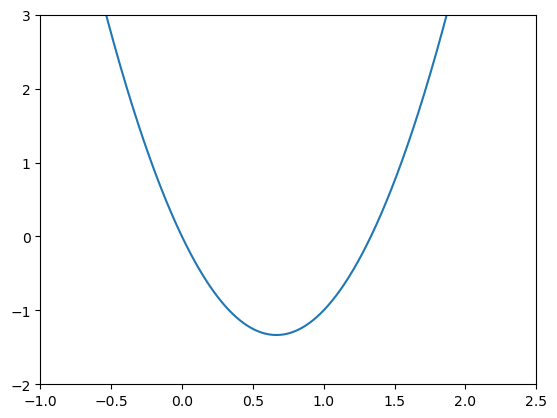

In [3]:
f_prime = lambda x: 3 * x**2 - 4 * x
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show() # исследуем уже другую функцию с разными данными и строим график
# f_prime = lambda x: 3 * x*2 - 4 * x:  Здесь определяется анонимная функция (лямбда-функция) f_prime, 
#которая вычисляет производную некоторой функции (вероятно,  f(x) = x³ - 2x²).  Производная  вычисляется  как  3x² - 4x.
# x = np.linspace(-1, 2.5, 1000):  Создается массив x из 1000 точек, 
# равномерно распределенных на интервале от -1 до 2.5.  np.linspace — функция из библиотеки NumPy.
# plt.plot(x, f_prime(x)):  Строится график функции f_prime.  
# Значения  массива  x  используются  как  значения  на  оси  X,  а  значения  
# f_prime(x)  (результат  применения  лямбда-функции  к  каждому  элементу  массива  x)  —  как  значения  на  оси  Y.
# plt.xlim([-1, 2.5]):  Устанавливаются  пределы  отображаемого  диапазона  по  оси  X  от  -1  до  2.5.
# plt.ylim([-2, 3]):  Устанавливаются  пределы  отображаемого  диапазона  по  оси  Y  от  -2  до  3.
#plt.show():  Отображает  построенный  график.
# В  итоге,  код  построит  и  отобразит  график  производной  функции  f(x) = x³ - 2x²  на  интервале  [-1, 2.5] 
# с  указанными  пределами  по  осям  координат.  
#График  покажет,  как  изменяется  скорость  изменения  исходной  функции  в  зависимости  от  значения  x.



In [4]:
lr = 0.1 # коэффицент отвечаюзий за скорость обучения (чем быстрее она обучает, тем нестрабильнее она предсказывает результаты минимумов и максимумов)
points = [2] # Коэффицент, который показывает с какого периода мы начинаем поиск минимумов и максимумов (в зависимости, что ищем)
n_epochs = 15 # Сколько проходов мы делаем по поискам (сколько раз модели проходят по нашей выборке, переобучение)

In [5]:
for _ in range(n_epochs):
    cur_point = points[-1] # Проводим цикл повторений эпох (переобучений)
    grad = f_prime(cur_point) #градиент - направление наискорейшего возрастания функции.
    new_point = cur_point - lr * grad # Мы ищем новый минимум начиная с текущей точки отнимая от неё производение коэффициентов обучение на градиент. Ищем новую точку начиная с текущей в которой с минимума функция будет еще быстрее возрастать
    points.append(new_point) # Мы принимаем новую точку за текущую и повторяем цикл

In [6]:
y_points = [f(p) for p in points] # Позволяет строить точки

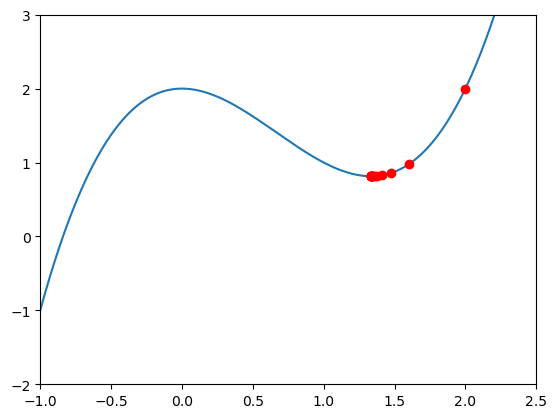

In [7]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro') # делает красные кружочки
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

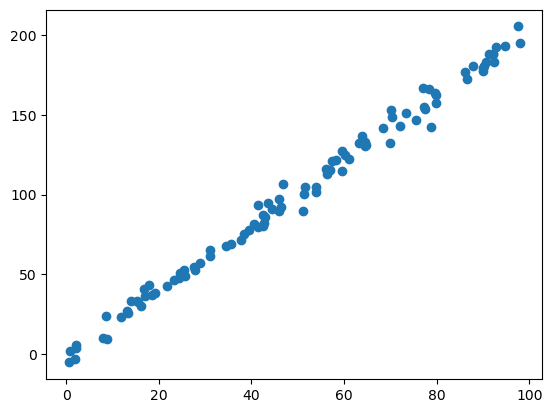

In [8]:
N = 100 # Количество точек 
X = np.random.uniform(low=0, high=100, size=N) # генерирует случайное количество числ, которые равномерно распределенные в заданном интервале.
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

In [9]:
EPOCHS = 20 # обучаем модель 
LEARNING_RATE = 0.0001 # коэффицент отвечаюзий за скорость обучения (чем быстрее она обучает, тем нестрабильнее она предсказывает результаты минимумов и максимумов)

In [10]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += (pred - y[i]) ** 2
    return total_cost / len(X) # Считаем сумму квадратов ошибок (чтобы ошибки с минусом не портили сумму)

In [11]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i])
    return total_cost / len(X) # Считаем частные производные teta 1 и teta 2

In [12]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i]) * X[i]
    return total_cost / (len(X)) # Корректируем наши теты с учётом ошибок

In [13]:
theta0 = 1
theta1 = 1

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1) # используем метод градиентного спуска для нахождения оптимальных тета 
    dt1 = der_theta1(X, Y, theta0, theta1) # находятся все наши теты
    
    theta0 = theta0 - LEARNING_RATE * dt0 #значение тет меняется в противопожном направлении градиенту для снижения ошибок
    theta1 -= LEARNING_RATE * dt1 #значение тет меняется в противопожном направлении градиенту для снижения ошибок (всех)
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1)) # При каких тета какие ошибки

t0: 1.0099721882888868 t1: 1.6549119429306915 cost: 438.2889692296664
t0: 1.0134413595228253 t1: 1.8863521694482916 cost: 75.73865928333161
t0: 1.0146124316554688 t1: 1.9681416924917439 cost: 30.461664553846234
t0: 1.0149713809756804 t1: 1.997046141530772 cost: 24.80720443497902
t0: 1.0150433367618588 t1: 2.0072615300348033 cost: 24.10098665273222
t0: 1.0150138744912023 t1: 2.010872389914698 cost: 24.01272788473383
t0: 1.014948574696186 t1: 2.012149274860441 cost: 24.00164265499317
t0: 1.0148706128862552 t1: 2.012601356179087 cost: 24.000195213705236
t0: 1.0147881790564066 t1: 2.0127619600384783 cost: 23.999951389272482
t0: 1.014704167469497 t1: 2.01281955861535 cost: 23.999857883985438
t0: 1.0146196009291824 t1: 2.012840756107181 cost: 23.99978315723508
t0: 1.0145348408840038 t1: 2.012849089776602 cost: 23.999710781631343
t0: 1.0144500150661657 t1: 2.0128528774587195 cost: 23.99963870564643
t0: 1.014365168614838 t1: 2.0128550585939453 cost: 23.999566673075716
t0: 1.014280317481631 t1:

In [14]:
cost_function(X,Y,10,10) # считаем сумму ошибок

213438.5950003672

In [16]:
EPOCHS = 20
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)

list_params_gd = [params.copy()]
for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) * (2/len(predictions))
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) * (2/len(predictions))    

    list_params_gd.append(params.copy()) # Используем метод градиента для снижения наших ошибок

[ 0.00110855 -0.28954407]


In [17]:
costs[-1] # смотрим сумму ошибок

23.39684911799613

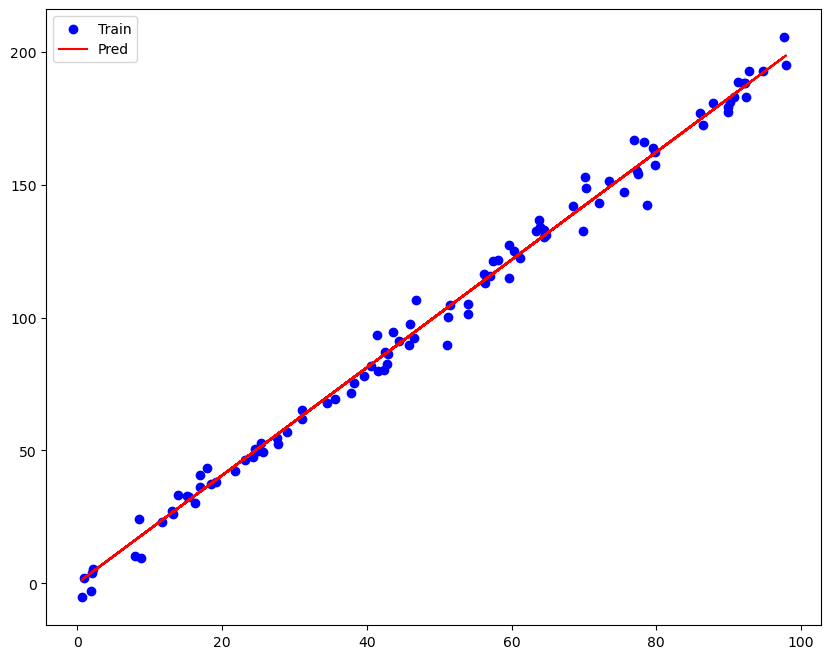

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, color='blue', label='Train')
plt.plot(X, preds[10], color='red', label='Pred')
plt.legend()
plt.show() # График показывет совпадения наших предсказаний с нашей функцией

In [20]:
params # получаем наши оптимальные теты

array([0.03592904, 2.02788084])